In [ ]:
!wget -O database.zip https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
!unzip database.zip

--2023-12-10 20:59:09--  https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
Resolving humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)... 195.220.108.28
Connecting to humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)|195.220.108.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘database.zip’

database.zip            [  <=>               ]   2.28G  10.5MB/s    in 3m 26s  

2023-12-10 21:02:37 (11.3 MB/s) - ‘database.zip’ saved [2452589021]

Archive:  database.zip
 extracting: ACDC/database/training/patient015/MANDATORY_CITATION.md  
 extracting: ACDC/database/training/patient015/patient015_frame10_gt.nii.gz  
 extracting: ACDC/database/training/patient015/patient015_frame10.nii.gz  
 extracting: ACDC/database/training/patient015/patient015_frame01_gt.nii.gz  
 extracting: ACDC/database/training/pat

In [ ]:
# Test code for loading one file from .nii to numpy array

import nibabel as nib
import numpy as np
from scipy.ndimage import affine_transform

# Specify the path to the input .nii.gz file
input_nii_gz_file = 'ACDC/database/training/patient025/patient025_frame01.nii.gz'

# Load the NIfTI file
nifti_image = nib.load(input_nii_gz_file)

# Access the data and header information
nifti_data = nifti_image.get_fdata()
header = nifti_image.header

# Access the shape of the data (dimensions) like this:
data_shape = nifti_data.shape

# Access the header information, such as the voxel sizes:
voxel_sizes = header.get_zooms()

affine_matrix = nifti_image.affine
inverse_affine = np.linalg.inv(affine_matrix)
inverse_affine_short = inverse_affine[:3,:3]
scaled_data = affine_transform(nifti_data, inverse_affine_short, output_shape=(216, 304, 8))

# Print some information for demonstration
print(f"Data Shape: {data_shape}")
print(f"Voxel Sizes: {voxel_sizes}")

print(f"affine shape: {affine_matrix.shape}")
print(f"affine: {affine_matrix}")


print(f"Inverse affine shape: {inverse_affine.shape}")
print(f"Inverse affine: {inverse_affine}")

print(f"Scled data shape: {scaled_data.shape}")
print(f"Scled data: {scaled_data}")

print(f"Data shape: {nifti_data.shape}")
print(f"Data: {nifti_data}")


Data Shape: (256, 256, 9)
Voxel Sizes: (1.3671875, 1.3671875, 10.0)
affine shape: (4, 4)
affine: [[-1. -0.  0.  0.]
 [-0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Inverse affine shape: (4, 4)
Inverse affine: [[-1. -0. -0. -0.]
 [-0. -1. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Scled data shape: (216, 304, 8)
Scled data: [[[ 3.46019510e-17 -4.30666498e-18 -2.19931908e-19 ...  9.00630937e-21
   -7.04425354e-21 -2.00511898e-21]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 0.0000

Text(0.5, 0.98, 'Center slices for EPI image')

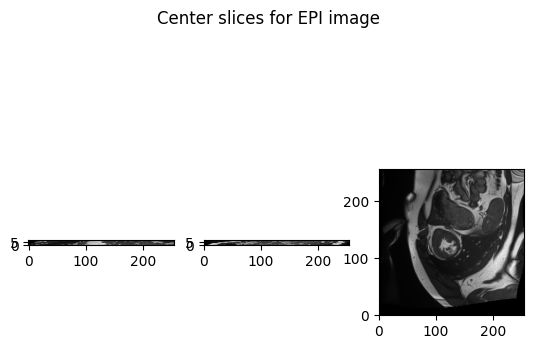

In [ ]:
# Test code for data exploration, visualization

import matplotlib.pyplot as plt

def show_slices(slices):
   #Function to display row of image slices
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = nifti_data[110, :, :]
slice_1 = nifti_data[:, 150, :]
slice_2 = nifti_data[:, :, 6]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")


In [ ]:
# Go through every folder and save the files into input-output numpy arrays

import os
import numpy as np
import nibabel as nib
from scipy.ndimage import affine_transform
from sklearn.model_selection import train_test_split

# Specify the path to the main folder containing 'test' and 'train' subfolders.
main_folder = 'ACDC/database'

# Initialize empty lists to store the data
input = []
output = []

#Function to load nifti image
def load_images(file_path):
  img = nib.load(file_path).get_fdata()
  return img

# Function to check if a file should be ignored
def should_ignore(file_name):
    return file_name == 'MANDATORY_CITATION.md'

# Iterate through 'test' and 'train' folders
for folder_name in ['testing', 'training']:
    if not should_ignore(folder_name):
      folder_path = os.path.join(main_folder, folder_name)
      patient_folders = os.listdir(folder_path)

      # Iterate through patient folders
      for patient_folder in patient_folders:
        if not should_ignore(patient_folder):
          patient_path = os.path.join(folder_path, patient_folder)
          files = os.listdir(patient_path)

          # Iterate through files in each patient folder
          for file_name in files:
            file_path = os.path.join(patient_path, file_name)

            if file_name.endswith('.nii.gz') & ('4d' not in file_name):
              #Separate the gt and non-gt files
              if 'gt' in file_name:
                gt_img = load_images(file_path)
                output.append([folder_name, gt_img])
              else:
                img = load_images(file_path)
                input.append([folder_name, img])

input_array = np.array(input)
output_array = np.array(output)

<ipython-input-4-88a13b6a0418>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_array = np.array(input)
<ipython-input-4-88a13b6a0418>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_array = np.array(output)


In [ ]:
print(f"input shape: {input_array.shape}")
print(f"output shape: {output_array.shape}")
print(f"input folders: {input_array[:10,0]}")
print(f"input data: {input_array[:3,1]}")
print(f"output data: {output_array[:3,1]}")

input shape: (300, 2)
output shape: (300, 2)
input folders: ['testing' 'testing' 'testing' 'testing' 'testing' 'testing' 'testing'
 'testing' 'testing' 'testing']
input data: [array([[[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.]],

        [[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.]],

        [[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.

In [ ]:
from sklearn.model_selection import train_test_split

print(f"Input array shape: {input_array.shape}")

input_train = input_array[np.where(input_array[:, 0] == 'training')]
output_train = output_array[np.where(output_array[:, 0] == 'training')]

print(f"Input train shape: {input_train.shape}")
print(f"Output train shape: {output_train.shape}")

input_test = input_array[np.where(input_array[:, 0] == 'testing')]
output_test = output_array[np.where(output_array[:, 0] == 'testing')]
input_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)

print(f"Input validation shape: {input_val.shape}")
print(f"Output validation shape: {output_val.shape}")
print(f"Input test shape: {input_test.shape}")
print(f"Output test shape: {output_test.shape}")

Input array shape: (300, 2)
Input train shape: (200, 2)
Output train shape: (200, 2)
Input validation shape: (60, 2)
Output validation shape: (60, 2)
Input test shape: (40, 2)
Output test shape: (40, 2)


In [ ]:
# NEW PADDING
import numpy as np

# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)
print(largest_input_shape, largest_output_shape)

# Function to pad and process a batch of arrays
def process_batch(array, largest_shape, batch_size):
    padded_arrays = []
    for i in range(0, len(array), batch_size):
        batch = array[i:i + batch_size]
        batch_padded = []
        for name, arr in batch:
            max_shape = np.maximum(largest_shape, arr.shape)
            pad_width = [(0, max_dim - curr_dim) for max_dim, curr_dim in zip(max_shape, arr.shape)]
            padded_arr = np.pad(arr, pad_width, mode='constant')
            batch_padded.append((name, padded_arr))
        padded_arrays.extend(batch_padded)
    return padded_arrays

[428 512  21] [428 512  21]


In [ ]:
import numpy as np

# Assuming input_array has text in the first column and 3D images in the second column
# Function to slice 3D images along the third axis and create 2D images
def slice_3d_images(input_array):
    sliced_images = []
    for text, image_3d in input_array:
        for i in range(image_3d.shape[2]):
            image_2d = image_3d[:, :, i].astype('float16')
            sliced_images.append(image_2d)
    return np.array(sliced_images)

In [ ]:
# Slice 3D images to get 2D images
# Slice 3D images to get 2D images
sliced_input_train = slice_3d_images(input_train)
sliced_input_val = slice_3d_images(input_val)
sliced_input_test = slice_3d_images(input_test)

sliced_output_train = slice_3d_images(output_train)
sliced_output_val = slice_3d_images(output_val)
sliced_output_test = slice_3d_images(output_test)

print(sliced_input_train.shape)
print(sliced_input_val.shape)
print(sliced_input_test.shape)
print(sliced_output_train.shape)
print(sliced_output_val.shape)
print(sliced_output_test.shape)

<ipython-input-8-234c5cfe96c0>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sliced_images)


(1902,)
(690,)
(386,)
(1902,)
(690,)
(386,)


In [ ]:
sliced_input_train = sliced_input_train[:200]
sliced_output_train = sliced_output_train[:200]
sliced_input_val = sliced_input_val[:80]
sliced_output_val = sliced_output_val[:80]
sliced_input_test = sliced_input_test[:40]
sliced_output_test = sliced_output_test[:40]

print(sliced_input_train.shape)
print(sliced_input_val.shape)
print(sliced_input_test.shape)
print(sliced_output_train.shape)
print(sliced_output_val.shape)
print(sliced_output_test.shape)

(200,)
(80,)
(40,)
(200,)
(80,)
(40,)


In [ ]:
sliced_inputs_all = np.concatenate((sliced_input_train, sliced_input_val, sliced_input_test))
print(f"sliced_inputs_all shape: {sliced_inputs_all.shape}")

sliced_inputs_all shape: (320,)


In [ ]:
max_width = max(image.shape[1] for image in sliced_inputs_all)
max_height = max(image.shape[0] for image in sliced_inputs_all)

print(f"Max width: {max_width}, Max height: {max_height}")

Max width: 512, Max height: 428


In [ ]:
# Round up the maximum height to be divisible by 32
padded_height = ((max_height - 1) // 32 + 1) * 32
print(f"Padded height (to be divisible by 32): {padded_height}")

Padded height (to be divisible by 32): 448


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_train.shape)  # The shape will be (total_2d_images, padded_height, padded_width)

(1902, 448, 512)


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_train.shape)

(1902, 448, 512)


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_val.shape)

(690, 448, 512)


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_val.shape)

(690, 448, 512)


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_test.shape)

(386, 448, 512)


In [ ]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_test.shape)

(386, 448, 512)


In [ ]:
# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)

print(largest_input_shape, largest_output_shape)

[428 512  21] [428 512  21]


In [ ]:
# Find the smallest shape among all the arrays
smallest_input_shape = np.min([arr.shape for _, arr in input_array], axis=0)
smallest_output_shape = np.min([arr.shape for _, arr in output_array], axis=0)

print(smallest_input_shape, smallest_output_shape)

[154 154   6] [154 154   6]


In [ ]:
# Normalize the inputs to the range [0, 1]
padded_input_train_normalized = (padded_input_train - np.min(padded_input_train)) / (np.max(padded_input_train) - np.min(padded_input_train))
padded_input_val_normalized = (padded_input_val - np.min(padded_input_val)) / (np.max(padded_input_val) - np.min(padded_input_val))
padded_input_test_normalized = (padded_input_test - np.min(padded_input_test)) / (np.max(padded_input_test) - np.min(padded_input_test))

# Stack the datasets
train_dataset = np.stack((padded_input_train_normalized, padded_output_train), axis=0)
val_dataset = np.stack((padded_input_val_normalized, padded_output_val), axis=0)
test_dataset = np.stack((padded_input_test_normalized, padded_output_test), axis=0)

# Transpose the resulting arrays to get the desired shapes
train_dataset = np.transpose(train_dataset, (1, 0, 2, 3))
val_dataset = np.transpose(val_dataset, (1, 0, 2, 3))
test_dataset = np.transpose(test_dataset, (1, 0, 2, 3))

print(train_dataset.shape)
print(val_dataset.shape)
print(test_dataset.shape)


(1902, 2, 448, 512)
(690, 2, 448, 512)
(386, 2, 448, 512)


In [ ]:
def find_min_max_values(loader):
    min_value = float('inf')
    max_value = float('-inf')

    for batch in loader:
        _ , outputs = batch
        batch_min = outputs.min().item()
        batch_max = outputs.max().item()

        min_value = min(min_value, batch_min)
        max_value = max(max_value, batch_max)

    return min_value, max_value

# Find the smallest and largest values in the train DataLoader
min_value, max_value = find_min_max_values(train_dataset)

print(f"Smallest value in the train dataset: {min_value}")
print(f"Largest value in the train dataset: {max_value}")

Smallest value in the train dataset: 0.0
Largest value in the train dataset: 3.0


In [ ]:
def find_min_max_values(loader):
    min_value = float('inf')
    max_value = float('-inf')

    for batch in loader:
        inputs, _ = batch
        batch_min = inputs.min().item()
        batch_max = inputs.max().item()

        min_value = min(min_value, batch_min)
        max_value = max(max_value, batch_max)

    return min_value, max_value

# Find the smallest and largest values in the train DataLoader
min_value, max_value = find_min_max_values(train_dataset)

print(f"Smallest value in the train dataset: {min_value}")
print(f"Largest value in the train dataset: {max_value}")

Smallest value in the train dataset: 0.0
Largest value in the train dataset: 1.0


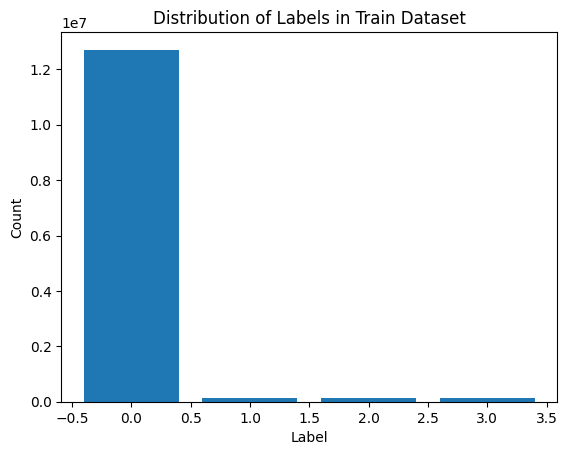

In [55]:
import matplotlib.pyplot as plt

# Assuming train_dataset is a PyTorch Dataset
# Adjust this based on your actual data loading mechanism

labels_list = []

for i in range(len(train_dataset)):
    # Extract the labels for the i-th sample
    labels = train_dataset[i][1, :, :]
    labels_list.append(labels)

# Convert the list of label matrices to a NumPy array
labels_array = np.array(labels_list)

# Plot the distribution of labels
label_counts = np.unique(labels_array, return_counts=True)
labels, counts = label_counts

plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Train Dataset')
plt.show()


In [56]:
# Calculate weights as normalized counts
weights = counts / np.sum(counts)

# Print the weights
print("Weights:", weights)

Weights: [0.96966644 0.01035934 0.00934326 0.01063095]


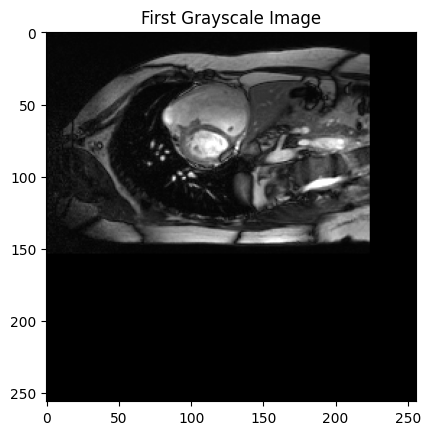

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_dataset is your dataset
image = train_dataset[1, 0, :, :]

plt.imshow(image, cmap='gray')
plt.title('First Grayscale Image')
plt.show()

<ipython-input-30-a2c2ecfaee23>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)  # Choose a color map with 4 categories


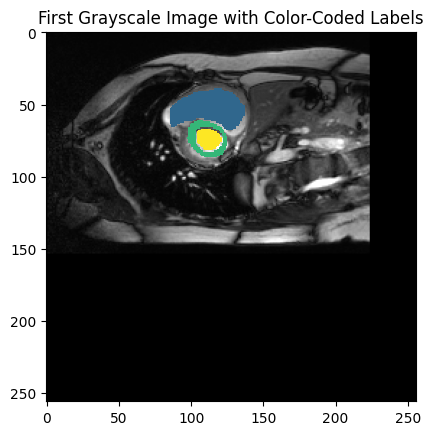

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_dataset is your dataset
image = train_dataset[1, 0, :, :]  # Extract the first grayscale image
labels = train_dataset[1, 1, :, :]  # Extract the labels for the first sample

# Create a color map for the labels
cmap = plt.cm.get_cmap('viridis', 4)  # Choose a color map with 4 categories

# Plot the grayscale image
plt.imshow(image, cmap='gray')

# Overlay the labels with different colors
for i in range(1, 4):
    plt.imshow(np.ma.masked_where(labels != i, labels), cmap=cmap, vmin=0, vmax=3)

plt.title('First Grayscale Image with Color-Coded Labels')
plt.show()

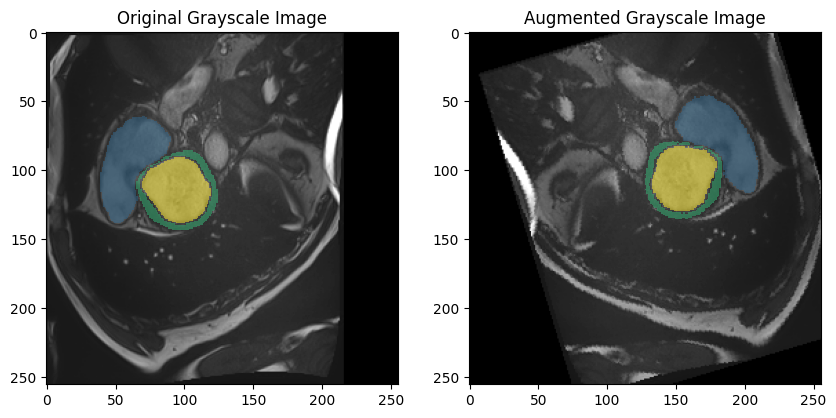

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F

train_idx = 0

# Assuming train_dataset is your dataset
image = train_dataset[train_idx, 0, :, :]  # Extract the first grayscale image
labels = train_dataset[train_idx, 1, :, :]  # Extract the labels for the first sample

# Convert NumPy arrays to PyTorch tensors
image_tensor = torch.from_numpy(image).float().unsqueeze(0)  # Convert to float32 and add batch dimension
labels_tensor = torch.from_numpy(labels).float().unsqueeze(0)  # Convert to float32 and add batch dimension

# Define data augmentation transformations
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=45),
])

# Concatenate the image and labels along the channel dimension
combined_tensor = torch.cat([image_tensor, labels_tensor], dim=0)

# Apply the same data augmentation to both the image and labels
seed = np.random.randint(2147483647)
torch.manual_seed(seed)
augmented_combined_tensor = data_transform(combined_tensor)

# Split the augmented tensor back into image and labels
augmented_image_tensor = augmented_combined_tensor[0:1, :, :]
augmented_labels_tensor = augmented_combined_tensor[1:2, :, :]

# Convert PyTorch tensors back to NumPy arrays
augmented_image = augmented_image_tensor.squeeze(0).numpy()
augmented_labels = augmented_labels_tensor.squeeze(0).numpy()

# Plot the original image and labels
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

# Overlay the original labels with different colors
for i in range(1, 4):
    plt.imshow(np.ma.masked_where(labels != i, labels), cmap='viridis', vmin=0, vmax=3, alpha=0.5)

# Plot the augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image, cmap='gray')
plt.title('Augmented Grayscale Image')

# Overlay the augmented labels with different colors
for i in range(1, 4):
    plt.imshow(np.ma.masked_where(augmented_labels != i, augmented_labels), cmap='viridis', vmin=0, vmax=3, alpha=0.5)

plt.show()
